In [ ]:
from google.colab import drive
from google.colab.patches import *
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import os
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow_hub as hub

In [ ]:
print("tensorflow version: ",tf.__version__)
# print("GPU available",tf.test.is_gpu_available())
print("GPU available: ",tf.config.list_physical_devices('GPU'))

tensorflow version:  2.13.0
GPU available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
input_folder_content="/content/drive/MyDrive/google_colab_datasets/TamilContentImages/*.jpg"
input_folder_styel="/content/drive/MyDrive/google_colab_datasets/Artworks/*.jpg"
output_folder="/content/drive/MyDrive/google_colab_datasets/output/NST  images/"

sample_style="/content/drive/MyDrive/google_colab_datasets/Artworks/423786.jpg"
sample_content="/content/drive/MyDrive/google_colab_datasets/TamilContentImages/C_image9.jpg"

In [ ]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
def load_image(path):
  img=tf.io.read_file(path)
  img=tf.image.decode_image(img,channels=3)
  img=tf.image.convert_image_dtype(img,tf.float32)
  img=img[tf.newaxis,:]
  return img

In [ ]:
content_img=load_image(sample_content)
style_img=load_image(sample_style)

In [ ]:
print(content_img.shape)
print(style_img.shape)

(1, 1071, 1428, 3)
(1, 768, 1366, 3)


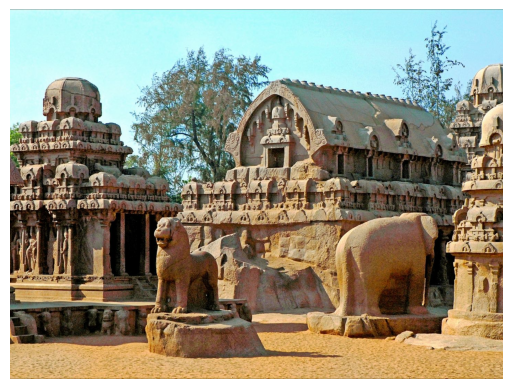

In [ ]:
plt.imshow(np.squeeze(content_img))
plt.axis('off')
plt.show()

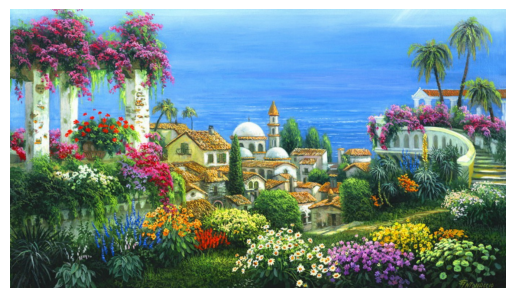

In [ ]:
plt.imshow(np.squeeze(style_img))
plt.axis('off')
plt.show()

In [ ]:
stylized_image=model(tf.constant(content_img),tf.constant(style_img))[0]

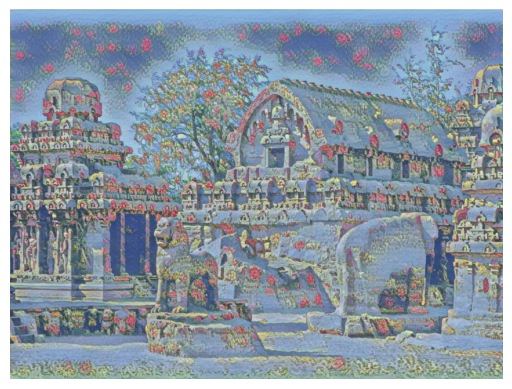

In [ ]:
plt.imshow(np.squeeze(stylized_image))
plt.axis('off')
plt.show()

In [ ]:
cv2.imwrite((output_folder+"pretain_model_output.jpg"),cv2.cvtColor(np.squeeze(stylized_image)*255,cv2.COLOR_BGR2RGB))

True